# L1 - Градиентый спуск и линейные модели

In [7]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt

### 1. Линейные модели

Пусть есть обучающая выборка $\{x_i\}_{i=1}^{\mathcal{l}} \subset \mathbb{R}^{n}$, при этом каждому объекту в соответсвие поставлена метка класса $y_{i} \in \{-1, +1\}$. Мы предполагаем, что в пространтсве $\mathbb{R}^{n}$ существует гиперплоскость, которая относительно некоторой метрики "хорошо" разделяет объекты на два класса. При этом гиперплоскость задается параметрически:

<center>
$wx + b = 0$
</center>

Объект $x$ имеет метку $y = +1$, если $wx + b \geq 0$ и $y = -1$ в ином случае. Вектор $w$ является нормалью к гиперплоскости, указывающий с какой стороны находятся объекты класса $y = +1$.

### 2. Обучение

Поиск модели ограничен до одного семейства, заданного параметрически. Обучение в таком случае сводится к задаче оптимизации эмпирического риска

<center>
$\arg \min_{\theta} Q(\theta) = \arg \min_{\theta} \frac{1}{l}\sum_{i=1}^{\mathcal{l}} \mathcal{L}(a(x_i|\theta), y_i)$, где
</center>

* $a(x|\theta)$ - алгоритм из некотрого семейства, заданный параметром $\theta$
* $\theta$ - вектор пространства параметров
* $\mathcal{L}$ - функция потерь, которая показывает на сколько точно предсказание

Очевидно, что качество предсказания зависит от выбранной модели. Но также оно зависит и от выбора функции потерь $\mathcal{L}$, которая существенно влияет на процесс обучения.

### 3. Функция потерь

В литературе можно встретить такое понятие, как отступ
<center>$ M(x, y) = y\cdot(wx + b)$,</center>
его можно трактовать, как уровень удаление от гиперплоскости в сторону своего класса. Это позволит нам кратко записывать функции потерь.

Наиболее естественной функцией потерь для задачи классификации является относительное количество неправильных классификаций, то есть
<center>$ \mathcal{L}(y_{pred}, y_{true}) = [y_{pred} \neq y_{true}] = [M(x, y_{true}) < 0]$</center>

Решение такой задачи является очень трудоемким, поэтому на практике производят оптимизацию реклаксированной ошибки.

К примеру **квадратичная ошибка**

<center>$ Q(w) = \frac{1}{\mathcal{l}} \sum_{i=1}^{\mathcal{l}}((wx_i+b) - y_i)^{2}$</center>

Она многим хороша, к примеру, в задачи оптимизации все сводится к выпуклому функционалу с локальным минимумом. Если представить, что признаки объекта $x_i$ записаны в матрицу $X$ построчно, а все метки записаны в вектор-столбец $Y$, то задача выглядит

<center>
$\arg\min_{w}||Xw - Y ||_{2}$,
</center>

и имеет аналитическое решение

<center>
$w = (X^TX)^{-1}X^TY$.
</center>

**Задание**

1. Сгенерируйте на плоскости 2 облака точек. Они должны слегка пересекаться, а точки внутри распределены нормально.
2. Обучите линейную модель, разделяющую два облака точек, использую формулу выше.
3. Изобразите облака с помощью библиотеки matplotlib, воспользуйтесь функцией scatter, для удобства точки можно сделать прозрачными.
4. Постройте полученнную разделяющую прямую.
5. Оцените сложность алгоритма обучения.

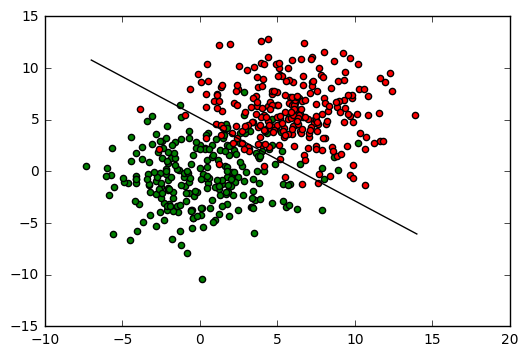

In [2]:
def generate_cloud(center, count):
    points = []
    for i in range(count):
        point = np.random.normal(0.0, 3.0, 2)
        points.append(point + center)
    return points


def solve(cloud1, cloud2):
    matrix = cloud1 + cloud2
    n = len(cloud1)
    # we add 1 to each row of the matrix for computing b=w[0] in line equation
    matrix = [[1] + row.tolist() for row in matrix]
    pseudo_inverse_matrix = np.linalg.pinv(matrix)
    labels = [1 if i < n else -1 for i in range(2 * n)]
    return np.dot(pseudo_inverse_matrix, labels)


def draw_plot(cloud1, cloud2, w):
    plt.scatter([p[0] for p in cloud1], [p[1] for p in cloud1], c='g')
    plt.scatter([p[0] for p in cloud2], [p[1] for p in cloud2], c='r')
    plt.plot([x for x in range(-7, 15)], [(-w[0] - x * w[1]) / w[2] for x in range(-7, 15)], 'k-')
    plt.show()


def main():
    n = 250
    cloud1 = generate_cloud(np.array([0, 0]), n)
    cloud2 = generate_cloud(np.array([6, 6]), n)
    w = solve(cloud1, cloud2)
    draw_plot(cloud1, cloud2, w)


if __name__ == '__main__':
    main()


Еще популярна следующая релаксация
<center>$Q(w) = \frac{1}{\mathcal{l}} \sum_{i=1}^{\mathcal{l}} max(0, 1 - y_i\cdot(wx_i + b))$,</center>
если хотите узнать об этом более подробно, то вам стоит почитать про svm (support vector machine).

Логистическая функция же обладает вероятностным смыслом

<center>$ Q(w) = \frac{1}{\mathcal{l}} \sum_{i=1}^{\mathcal{l}} \ln(1 + \exp(-y_i\cdot(wx_i + b)))$</center>
В частности данный функционал приводит нас к оптимальному байесовскому классификатору при некоторых допущениях о распределении признаков. Но это совершенно отдельная история.

**Задание**

1. Пусть $\mathbb{P}\{y=1|x\} = \sigma(wx+b)$, где $\sigma(z) = \frac{1}{1 + \exp(-z)}$. Покажите, что задача
<center>$ \arg\min_{w, b} \sum_{x, y} \ln(1 + \exp(-y(wx + b)))$</center>
есть ничто иное, как максимазиция правдоподобия.
2. Отобразите все функционалы качества в осях $M \times Q$ для одного элемента.

### 4. Градиентный спуск

Для задачи оптимизации не всегда существует аналитическое решение, либо оно может быть очень сложным. В таком случае используют численные методы. Да, речь идет именно о градиентном спуске. Это итеративный алгоритм, который устроен следующим образом. Пусть есть $Q(x)$, которую необходимо оптимизировать и она дифференцируема. Тогда задачу

<center>$ \arg\min_{x} Q(x)$</center>

можно решить следующим образом

<center>$ x^{k+1} = x^{k} - \lambda \cdot \triangledown Q(x)$,</center>

где $\lambda$ - некоторый шаг градиентного спуска, а $k$ - номер этого шага.

От выбора правильного $\lambda$ сильно зависит процесс обучения. Если взять слишком большое значение, то алгоритм может не сойтись. Если слишком малое, то обучение будет длиться долго. Также существует распространенный прием, применяемый часто при обучении нейросетей, уменьшать значение $\lambda$ в соответствии с некоторым расписанием.

**Задание**
1. Предложите какую-нибудь квадратичную функцию с глобальным минимумом.
2. Найдите минимум методом градиентного спуска.
3. Отобразите на плоскости линии уровней функции, которую вы оптимизируете.
4. Покажите, какую траекторию проходит алгоритм градиентного спуска.
5. Как вы выбрали значение $\lambda$?

Значение $\lambda$ было выбрано так, чтобы алгоритм сходился достаточно быстро.

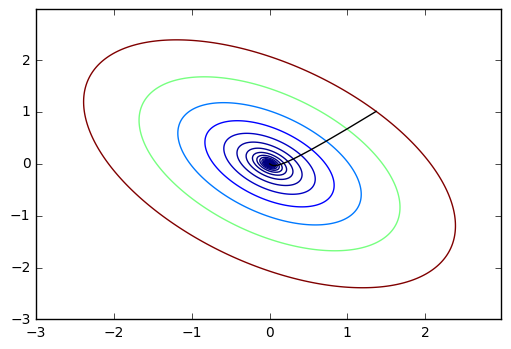

In [3]:
def f(point):
    x, y = point[0], point[1]
    return x ** 2 + x * y + y ** 2


def gradient(point):
    x, y = point[0], point[1]
    return np.array([2 * x + y, 2 * y + x])


def render(levels, path):
    # creating array of function values
    x = np.arange(-3, 3, 0.025)
    y = np.arange(-3, 3, 0.025)
    X, Y = np.meshgrid(x, y)
    Z = f([X, Y])
    levels.sort()
    plt.contour(X, Y, Z, levels)
    # drawing algorithm's path
    plt.plot([p[0] for p in path], [p[1] for p in path], 'k-')


def gradient_descend(start, path, levels):
    cur_point, prev_point = start, start + 1
    step_rate, eps = 0.1, 1 / 1e6
    while math.fabs(f(cur_point) - f(prev_point)) > eps:
        prev_point = cur_point.copy()
        cur_point -= gradient(cur_point) * step_rate
        path.append(cur_point.copy())
        levels.append(f(cur_point))
    return cur_point


def main():
    start_point = np.array([1.9, 1.5])
    path, levels = [], []
    gradient_descend(start_point, path, levels)
    render(levels, path)
    plt.show()

if __name__ == '__main__':
    main()


Существуют функции, которые плохо даются градиентному спуску. К примеру, функция Розенброка

<center>$f(x, y) = (1-x)^2 + 100(y-x^2)^2$.</center>

**Задание**
1. Проделайте все то же самое для функции Розенброка.
2. Какую проблему вы наблюдаете?
3. Как ее можно решить?

Алгоритм попадает на сторону продолговатого оврага, градиент направлен перпендикулярно ему, а направление, в котором находится глобальный минимум, параллельно оврагу, поэтому алгоритм просто прыгает с одной сторону оврага на другую, медленно двигаясь вдоль него к минимуму. Решение: прыгать 2 раза по градиенту, далее вектор, соединяющий 1 и 3 точку, будет направлен вдоль оврага, так как мы прыгнули с одной сторону на другую и вернулись обратно, продвинувшись немного вдоль оврага по направлению к минимуму. Теперь, зная направление, в котором находится минимум, нужно взять его вместо градиента и сделать третий прыжок:

[ 0.99980234  0.99960203]


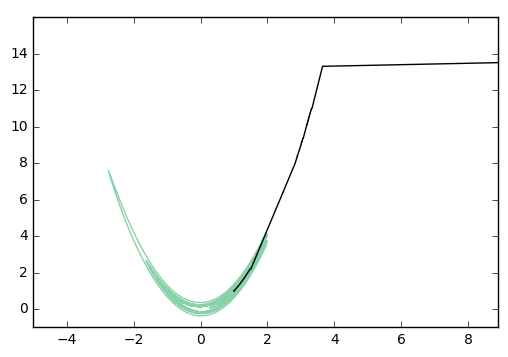

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

EPS = 1 / 1e10

def f(point):
    x, y = point[0], point[1]
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2


def gradient(point):
    x, y = point[0], point[1]
    return np.array([-2 * (1 - x) - 400 * (y - x ** 2) * x, 200 * (y - x ** 2)])


def render(f, bounds, levels, path):
    # creating array of function values
    delta = 0.025
    x = np.arange(bounds['min_x'], bounds['max_x'], delta)
    y = np.arange(bounds['min_y'], bounds['max_y'], delta)
    X, Y = np.meshgrid(x, y)
    Z = f([X, Y])
    levels.sort()
    plt.contour(X, Y, Z, levels, colors='#89D2A9')
    # drawing algorithm's path
    plt.plot([p[0] for p in path], [p[1] for p in path], 'k-')


def make_step(f, cur_point, direction):
    step_length = 1e5
    while f(cur_point) < f(cur_point - direction * step_length):
        step_length /= 2.99
    cur_point -= direction * step_length
    return cur_point


def gradient_descend(f, start, path, levels):
    path.append(start.copy())
    levels.append(f(start))
    prev_value = 1e18
    cur_point = start

    while math.fabs(f(cur_point) - prev_value) > EPS:
        prev_value = f(cur_point)
        point1 = cur_point.copy()
        cur_point = make_step(f, cur_point, gradient(cur_point))
        cur_point = make_step(f, cur_point, gradient(cur_point))
        cur_point = make_step(f, cur_point, (point1 - cur_point))
        path.append(cur_point.copy())
        levels.append(f(cur_point))

    return cur_point


start_point = np.array([8.9, 13.5])
bounds = {'min_x': -5, 'max_x': 2, 'min_y': -1, 'max_y': 16}
path, levels = [], []
print(gradient_descend(f, start_point, path, levels))
render(f, bounds, levels, path)
plt.show()


Существуют различные модификации алгоритма градиентного спуска. К примеру, метод наискорейшего спуска, где значение $\lambda$ зависит от шага

<center>$\lambda^{k} = \arg\min_{\lambda}Q(x_k - \lambda\triangledown Q(x_k))$.</center>

**Задание**
1. Снова разделите облака точек, только теперь оптимизируйте квадратичную ошибку метода градиентного спуска.
2. Отобразите полученную прямую и облака точек.
3. Сравните ответ с точным решением.
4. Попробуйте метод наискорейшего спуска.
5. Постройте график в осях (номер шага и значение $Q$).
6. Сравните скорость сходимости обычного и наискорейшего спуска.

Gradient descends time:  8.656253
Accurate solution:  [ 0.97459591 -0.17181327 -0.14367676]
Gradient descends solution:  [ 0.97461793 -0.1717471  -0.14360648]
Difference:  [ -2.20224280e-05  -6.61721860e-05  -7.02870120e-05]


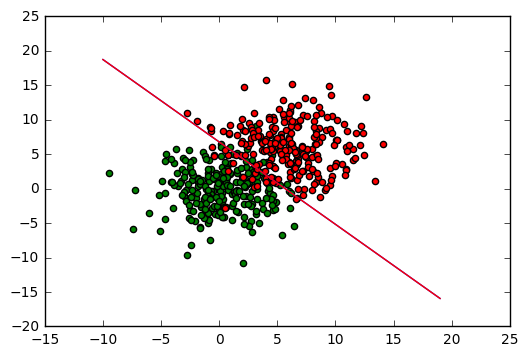

In [8]:
def generate_cloud(center, count):
    points = []
    for i in range(count):
        point = np.random.normal(0.0, 3.0, 2)
        points.append(point + center)
    return points


def gradient_descend(f, gradient, start_point):
    cur_point, prev_point = start_point, start_point + 1
    step_rate, eps = 1 / 1e5, 1 / 1e6
    while math.fabs(f(cur_point) - f(prev_point)) > eps:
        prev_point = cur_point.copy()
        cur_point -= gradient(cur_point) * step_rate
    return cur_point


def get_strict_solution(matrix, labels):
    pseudo_inverse_matrix = np.linalg.pinv(matrix)
    return np.dot(pseudo_inverse_matrix, labels)


def loss_f_gradient(w, x, y):
    grad = [0, 0, 0]
    for i in range(len(x)):
        dot_product = np.dot(x[i], w)
        grad[0] += 2 * (dot_product - y[i])
        grad[1] += 2 * (dot_product - y[i]) * x[i][1]
        grad[2] += 2 * (dot_product - y[i]) * x[i][2]
    return np.array(grad)


def loss_f(w, x, y):
    ans = 0
    for i in range(len(x)):
        ans += (np.dot(w, x[i]) - y[i]) ** 2
    return ans


def solve(matrix, labels):
    start_point = np.random.uniform(2, 10, 3)
    solution = gradient_descend(
        lambda point: loss_f(point, matrix, labels),
        lambda point: loss_f_gradient(point, matrix, labels),
        start_point)
    return solution / np.linalg.norm(solution)


def draw_plot(cloud1, cloud2, w1, w2):
    plt.scatter([p[0] for p in cloud1], [p[1] for p in cloud1], c='g')
    plt.scatter([p[0] for p in cloud2], [p[1] for p in cloud2], c='r')
    plt.plot([x for x in range(-10, 20)], [(-w1[0] - x * w1[1]) / w1[2] for x in range(-10, 20)], 'b')
    plt.plot([x for x in range(-10, 20)], [(-w2[0] - x * w2[1]) / w2[2] for x in range(-10, 20)], 'r')
    plt.show()


def main():
    n = 250
    cloud1 = generate_cloud(np.array([0, 0]), n)
    cloud2 = generate_cloud(np.array([6, 6]), n)
    matrix = cloud1 + cloud2
    # we add 1 to each row of the matrix for computing b=w[0] in line equation
    matrix = [[1] + row.tolist() for row in matrix]
    labels = [1 if i < n else -1 for i in range(2 * n)]
    time_start = time.clock()
    w = solve(matrix, labels)
    print("Gradient descends time: ", time.clock() - time_start)
    w2 = get_strict_solution(matrix, labels)
    w /= np.linalg.norm(w)
    w2 /= np.linalg.norm(w2)
    print('Accurate solution: ', w2)
    print('Gradient descends solution: ', w)
    print('Difference: ', w2 - w)
    draw_plot(cloud1, cloud2, w, w2)


if __name__ == '__main__':
    main()


И еще немного о проблемах градиентного спуска. Если у нас есть какие-то признаки, которые встречаются достаточно редко, то соответствующий столбец будет разряженным.

**Задание**
В чем заключается проблема?

Если признак с номером $j$ встречается редко, то чаще всего градиент $g$ будет таким, что $g_j=0$, и $w_j$ почти не будет меняться, хотя для классификации некоторых элементов этот признак может быть критичным.

Также нужно понимать, что градиентный спуск может попасть в "ловушку" локального минимума. Обычно это актуально для нейросетей. Самый простой способо решить эту проблема - сдедать несколько запусков алгоритма или иметь какой-то инсайд, из какой точки стоит начинать.

### 5. Стохастический градиентный спуск

Иногда количество данных может быть так велико, что даже градиентный спуск начинает работать медленно. Или же данные просто поступают к нам большим потоком, а параметры модели постепенно меняются. Тогда на сцену выходит метод стохастического градиента.

Идея пределельно проста. Можно делать шаг спуска, вычисляя ошибку и градиент не для всех элементов выборки, а для какого-то небольшого количества или даже для одного объекта.

**Задание**

1. Скачайте данные mnist c [Kaggle](https://www.kaggle.com/c/digit-recognizer).
2. Обучите линейный классификатор 0 и 1, используйте логистическую функцию потерь.
3. Проверьте качество классификации на отложенной выборке.
<center>$ \mathcal{L}(y_{pred}, y_{true}) = [y_{pred} \neq y_{true}]$ </center>
4. Как влияет размер батча на скорость и качество обучения?
5. Отобразите графики, которые доказывает ваши слова (оси придумайте сами).
6. Сколько проходов по данным вы делаете? Почему?


In [9]:
import math
import numpy as np


def parse_data():
    f = open('train.csv', 'r')
    s = ' '
    m, k = 0, 0
    labels, matrix = [], []
    while s:
        s = f.readline()
        if len(s) > 0 and (s[0] == '0' or s[0] == '1'):
            matrix.append(list(map(int, s[2:].split(','))))
            labels.append(int(s[0]))
        k += 1
    f.close()
    f = open('train.txt', 'w')
    for i in range(int(len(matrix) * 0.8)):
        f.write(str(labels[i]) + ',' + ','.join(map(str, matrix[i])) + '\n')
    f.close()
    f = open('check.txt', 'w')
    for i in range(int(len(matrix) * 0.8), len(matrix)):
        f.write(str(labels[i]) + ',' + ','.join(map(str, matrix[i])) + '\n')
    f.close()


def read_data(file_name):
    labels, matrix = [], []
    f = open(file_name, 'r')
    s = f.readline()
    while s:
        matrix.append(list(map(int, s[2:].split(','))))
        labels.append(int(s[0]))
        s = f.readline()
    f.close()
    matrix = [[1] + row for row in matrix]
    labels = list(map(lambda x: x if x == 1 else -1, labels))
    return {'matrix': matrix, 'labels': labels}


def loss_f(w, x, y):
    ans = 0.
    for i in range(len(x)):
        ans += math.log(1 + math.exp(-y[i] * np.dot(x[i], w)))
    return ans


def loss_f_gradient(w, x, y):
    grad = [0] * len(w)
    for i in range(len(x)):
        e = math.exp(-y[i] * np.dot(x[i], w))
        for j in range(len(w)):
            grad[j] += -y[i] * x[i][j] * e / (1 + e)
    return np.array(grad)


def gradient_descend(f, gradient, start_point, matrix, labels):
    eps, step_rate = 1 / 1e8, 1 / 1e6
    cur_point, prev_point = start_point.copy(), start_point.copy()
    prev_point += 0.1
    cur, size = 0, 3
    batch, batch_labels = matrix[cur:cur + size], labels[cur:cur + size]

    while math.fabs(np.linalg.norm(cur_point - prev_point)) > eps:
        prev_point = cur_point.copy()
        cur_point -= gradient(cur_point, batch, batch_labels) * step_rate
        cur += size
        if cur > len(labels):
            cur = 0
        batch, batch_labels = matrix[cur:cur + size], labels[cur:cur + size]

    return cur_point


def solve(matrix, labels):
    start_point = np.array([0.] * len(matrix[0]))
    w = gradient_descend(loss_f, loss_f_gradient, start_point, matrix, labels)
    return w


def measure_quality(w, matrix, labels):
    cnt = 0
    for i in range(len(matrix)):
        if labels[i] * np.dot(w, matrix[i]) >= 0:
            cnt += 1
    return cnt / len(matrix)


def main():
    data = read_data('train.txt')
    test_data = read_data('check.txt')
    w = solve(data['matrix'], data['labels'])
    print('Accuracy: ', measure_quality(w, test_data['matrix'], test_data['labels']))


# parse_data()

if __name__ == "__main__":
    main()


Accuracy:  0.9988662131519275


<img src='graph.jpg'>

При больших размерах батча точность быстрее приближалась к 99.8% (на более ранних шагах градиентного спуска), но после завершения была не ниже 99.5 при любых размерах.

У стохастического градиентного спуска также есть много всяких усовершествований, которые часто используются в реальной практике при обучении нейросетей.

Кстати, текущее значение $Q$ можно вычислять с помощью экспоненциального сглаживания.
<center>$Q^{k+1} = \gamma Q^k + (1 - \gamma) Q(x_{k+1})$, </center>

где $Q(x_{k+1})$ вычисляется для обрабатываемого батча.

**Задание**
1. Как зависит график от $\gamma$?
2. Каким способом лучше вычислять $Q$?

**Сохранение импульса**

Сохранения импульса позволяет избежать нам осциляции вдоль оси, по которой функция изменяется сильнее. Он заключается в том, что текущий градиентный шаг вычисляется на основе учета предыдущих шагов
<center> $x^{k+1} = x^{k} - s^{k}$,</center> где $s^k = \gamma s^{k-1} + \lambda\triangledown Q(x^k)$, при этом
 * $0 <\gamma < 1$ - коэффициент учета предыдущего импульса
 * $s^{-1} = 0$

**Задание**

1. Найдите минимум $Q(x, y) = 10x^2 + y^2$ c помощью обычного метода.
2. Воспользуйтесь методом сохранения импульса
3. Отобразите и сравните треки.
4. На основе чего вы выбрали $\gamma$?

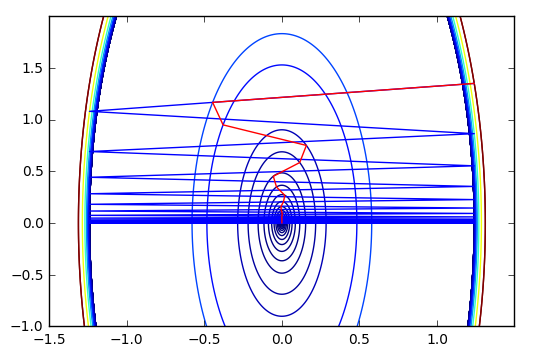

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt


def f(point):
    x, y = point[0], point[1]
    return 10 * x ** 2 + y ** 2


def gradient(point):
    x, y = point[0], point[1]
    return np.array([20 * x, 2 * y])


def render(levels, path, path_color):
    # creating array of function values
    x = np.arange(-1.5, 1.5, 0.0025)
    y = np.arange(-1, 2, 0.0025)
    X, Y = np.meshgrid(x, y)
    Z = f([X, Y])
    levels.sort()
    plt.contour(X, Y, Z, levels)
    # drawing algorithm's path
    plt.plot([p[0] for p in path], [p[1] for p in path], path_color)


def gradient_descend(start, path, levels):
    cur_point, prev_point = start, start + 1
    step_rate, eps = 0.1, 1 / 1e6
    while math.fabs(f(cur_point) - f(prev_point)) > eps:
        path.append(cur_point.copy())
        levels.append(f(cur_point))
        prev_point = cur_point.copy()
        cur_point -= gradient(cur_point) * step_rate
    return cur_point


def gradient_descend_with_momentum(start, path, levels):
    cur_point, prev_point = start, start + 1
    step_rate, eps, l = 0.1, 1 / 1e6, 0.68
    dx = np.array([0, 0])
    while math.fabs(f(cur_point) - f(prev_point)) > eps:
        path.append(cur_point.copy())
        levels.append(f(cur_point))
        prev_point = cur_point.copy()
        dx = (1 - l) * dx + l * gradient(cur_point) * step_rate
        cur_point -= dx
    return cur_point


def main():
    start_point = np.array([1.24, 1.35])
    path, levels, path2, levels2 = [], [], [], []
    gradient_descend(start_point.copy(), path, levels)
    gradient_descend_with_momentum(start_point.copy(), path2, levels2)
    render(levels, path, 'b')
    render(levels2, path2, 'r')
    plt.show()

if __name__ == '__main__':
    main()


Путь градиентного спуска с сохранением импульса колеблется намного меньше (так как если градиент резко меняет направление, то приращение уменьшается за счет градиентов предыдущих шагов), чем путь обычного, и совершает за счет этого немного меньше итераций. При слишком маленьком или слишком большом $\lambda$ это преимущество пропадает, оптимальным оказалось $\lambda\approx 0.7$.

**Ускоренный градиент Нестерова**

И логическое развитие этого подхода приводит к методу ускоренного градиента Нестерова. Шаг спуска вычисляется немного иначе
<center>$s^k = \gamma s^{k-1} + \lambda\triangledown Q(x^k - s^{k-1})$,</center>
то есть мы вычисляем градиент фукнции примерно в той точке, куда "занесет" нас накопленный импульс.

**Задание**

1. Сравните этот метод и предыдущий на функции Розенброка.
2. Отобразите и сравните треки.

Градиентный спуск с сохранением импульса ($\approx 1500$ итераций)
<img width=450 src='grad_momentum_Rozenbrock.jpg'>


Ускоренный градиентный спуск Нестерова ($\approx 1200$ итераций)


<img width=500 src='grad_Nesterov_Rozenbrock.jpg'>


Видно, что ускоренный градиент Нестерова позволяет лучше предсказать направление, в котором находится глобальный минимум, совершив меньше колебаний


<img scr='grad_momentum_Rozenbrock.jpg'>

**Adagrad (2011)**

Адаптивный градиент подразумевает вычисление $\lambda$ для каждой размерности входного вектора $x$. Неформально говоря, для разряженных признаков он делает больший шаг, а для обычных шаг поменьше.
<center> $x_{i}^{k + 1} = x_{i}^{k} - \frac{\lambda}{\sqrt{G_{i, i}^k } + \varepsilon} \cdot \frac{\partial Q}{\partial x_i}(x^k)$, где 
</center>


* $G^{k} = \sum_{t=1}^{k}g_t g_t^{T}$, где $g_t = \triangledown Q(x^t)$.
* $\varepsilon$ - небольшая добавка, чтобы избежать деление на ноль.

Как ни странно это улучшает сходимость процесса обучение, к примеру, при работе нейросетей с текстами.

**Задание**

1. Обучите модель этим способом для mnist.
2. Сравните сходимость с обычным стохастическим градиентным спуском (графики).

Получилось сделать сходимость быстрее обычного только с потерей точности.

**RMSprop**

Чтобы избежать постоянный рост знаменателя при $\lambda$ можно воспользоваться следующим вариантом шага. Давайте будем подсчитывать матрицу $G^k$ только для какого-то небольшого количества последних шагов, это можно сделать к примеру с помощью экспоненциального сглаживания

<center>$G^{k+1} = \gamma G^{k} + (1 - \gamma)g_{k+1}g_{k+1}^{T}$, где</center>
$0< \gamma < 1$ - чем больше значение, тем большее количество последних элементов мы учитываем.

**Adadelta (2012)**

**Задание**
1. Изучите метод самостоятельно и кратко опишите.
2. Как вы можете его объяснить?

Авторы хотели оптимизировать градиентный спуск, и у них было 2 идеи.

Первая состояла в том, что в случае Adagrad коэффициент при градиенте, $\dfrac{1}{\sqrt{\sum^{t}||g||}}$, монотонно убывает, поэтому приращение стремится к нулю, и обучение со вмеренем прекращается. Они решили эту проблему тем, что суммируются длины не всех градиентов с начала, а $w$ последних. Но так как вычислять это неэффективно (нужно хранить в памяти $w$ последних градиентов), они поддерживают приближенное значение с помощью экспонециального сглаживания.

Вторая идея заключалась в том, что приращение должно иметь ту же единицу измерения, что и $x$ (данное условие выполнено в методе Ньютона), и что для этого нужно домножать коэффециент при градиенте на $\sqrt{\sum \limits_{k=t-w}^{t-1}||\Delta x_k||}$. Коэффециент также вычисляется приближенно с помощью экспонециального сглаживания. Так как в числителе суммируются $\Delta x_k, k=t-w,\ldots, t-1$, то последнее приращение не влияет на числитель, но знаменатель увеличится, и это гарантирует, что если на текущем шаге градиент большой, то сильного изменения $x$ не произойдет.

**Adam (2015)**

**Задание**
1. Попробуйте скомбинировать метод сохранения импульса и RMSprop.
2. Получили ли вы какое-то улучшение?
3. Почему?

**Задание**
1. Предложите некоторую функцию, которая наглядно показываеn отличие в работе всех предложенных методов.
2. Сделайте анимацию, которая пошагово отрисовывает треки все спусков.